# Training a Logistic Regression model with Gradient Descent optimization (binary classification)


- input features: $x_1$, $x_2$, ..., $x_n$ and an extra constant $1$ (bias)
- output feature: $y$ - a probability prediction for being in Class 1 (being `positive` in case of a disease)
- weights are calculated in the training phase to minimize a loss function, weights $w_1, w_2, ... w_n$ and a weight associated with the bias $w_0$ (intercept)

- first we calculate the linear combination

$$w^T x + w_0=  w_1 x_1 + w_2 x_2 + ... + w_n x_n + w_0$$

- Then we apply an activation function, typically a sigmoid function


$$y_{pred} = f(w, x) = \sigma\left(w^T x + w_0\right) \hspace{3cm} \sigma(z) = \frac{1}{1 + e^{-z}}$$

### Cross entropy - loss function for binary classification

- $y_{true}$: binary (0-1) vector of the true categories 
- $y_{pred}$: vector of the predictions with probabilities, $0\leq y_{pred} \leq 1$

$$LOSS = -\frac{1}{n_{samples}}\sum\limits   y_{true} \log(y_{pred}) + (1 - y_{true})\log(1 - y_{pred})$$


Reminder: $$\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$$

$$L(w) =  -y_{true} \cdot \log(y_{pred}) - (1- y_{true}) \cdot \log(1- y_{pred})$$


$$\frac{\partial L(w)}{\partial w_i} = -y_{true}\cdot \frac{1}{y_{pred}} \cdot \underbrace{\sigma(z)}_{y_{pred}} \cdot \underbrace{(1 - \sigma(z))}_{1-y_{pred}} \cdot x_i -
(1-y_{true}) \cdot \frac{1}{1-y_{pred}} \cdot (-1) \cdot \underbrace{\sigma(z)}_{y_{pred}} \cdot \underbrace{(1 - \sigma(z))}_{1-y_{pred}} \cdot x_i$$

$$\frac{\partial L(w)}{\partial w_i} =  -y_{true} (1-y_{pred})\cdot x_i + (1-y_{true})y_{pred}\cdot x_i = \underline{\underline{(y_{pred} - y_{true}) \cdot x_i}}$$

$$X = \left(\begin{array}{cccc}
x_{10} & x_{11} & \cdots & x_{1n} \\
x_{20} & x_{21} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \cdots & x_{kn} \\
\end{array}
\right) \in \mathbb{R}^{k \times (n+1)} \ \ \ \ \ \ 
y = \left(\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_k
\end{array}
\right) \mathbb{R}^{k \times 1} 
$$

- without per-sample normalization: $$\nabla LOSS = X^T (y_{pred} - y_{true}) $$

In [27]:
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

import pandas as pd

names = ["Sample_code_number", "Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape",
         "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin",
         "Normal_Nucleoli", "Mitoses", "Class"]

#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
#                  names=names,
#                  na_values="?")

df = pd.read_csv("breast-cancer-wisconsin.data",
                  names=names,
                  na_values="?")

df["Bare_Nuclei"] = df["Bare_Nuclei"].fillna(df["Bare_Nuclei"].median())
df["Bare_Nuclei"] = df["Bare_Nuclei"].astype('int64')
df = df.set_index("Sample_code_number")

X = df[names[1:-1]].values   
y = df[names[-1]].values // 2 - 1
X.shape, y.shape

((699, 9), (699,))

In [28]:
### Append (preprend) the constant 1 (bias) column to X

num_samples = X.shape[0]
num_features = X.shape[1]

X = np.hstack((np.ones((num_samples, 1)), X))
X.shape

(699, 10)

In [36]:
### Create the necessary functions to 
### predict from (X, w) and calculate the gradient from (X, w,y ) 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    
def feedforward(X, w):
    
    z = X @ w  
    y_pred = sigmoid(z)
    
    return y_pred

def backprop(X, w, y):

    y_pred = feedforward(X, w)
    delta = y_pred - y

    gradient = X.T @ delta
    
    return gradient


In [50]:
w0 = np.zeros(num_features + 1)

gradient_true = backprop(X, w0, y)
gradient_true

array([ 108.5, -190. , -488.5, -460. , -356. , -153. , -606.5, -239.5,
       -411. ,  -68.5])

### Do a sanity check on the gradient

Reminder: in case of a two-variable function:
$$\frac{\partial f}{\partial x}(x, y) = \lim_{h\to 0} \frac{f(x+h, y) - f(x,y)}{h} $$
$$\frac{\partial f}{\partial y}(x, y) = \lim_{h\to 0} \frac{f(x, y+h) - f(x,y)}{h} $$

In [60]:
h = 0.0000001

w0 = np.zeros(num_features + 1)

y_pred = feedforward(X, w0)
f0 = log_loss(y, y_pred, normalize=False)
print(f0)

idx = 9
w0[idx] += h 

y_pred = feedforward(X, w0)
f1 = log_loss(y, y_pred, normalize=False)
print(f1)

print(f"Gradient approximation:\t{(f1 - f0) / h}")
print(f"True gradient:\t\t{gradient_true[idx]}")

484.50987921140177
484.50987236140645
Gradient approximation:	-68.49995315860724
True gradient:		-68.5


## Optimization: Gradient Descent algorithm

$$f(x, y) \to \min!$$

$$
\left.
\begin{array}[c]\\
\displaystyle x^{n+1} = x^{n} - \alpha \cdot \frac {\partial f}{\partial x}(x^n, y^n)\\
\displaystyle y^{n+1} = y^{n} - \alpha \cdot \frac {\partial f}{\partial y}(x^n, y^n)
\end{array}
\right\}$$

$$P^{n+1} = P^n - \alpha \cdot \nabla f(P)$$


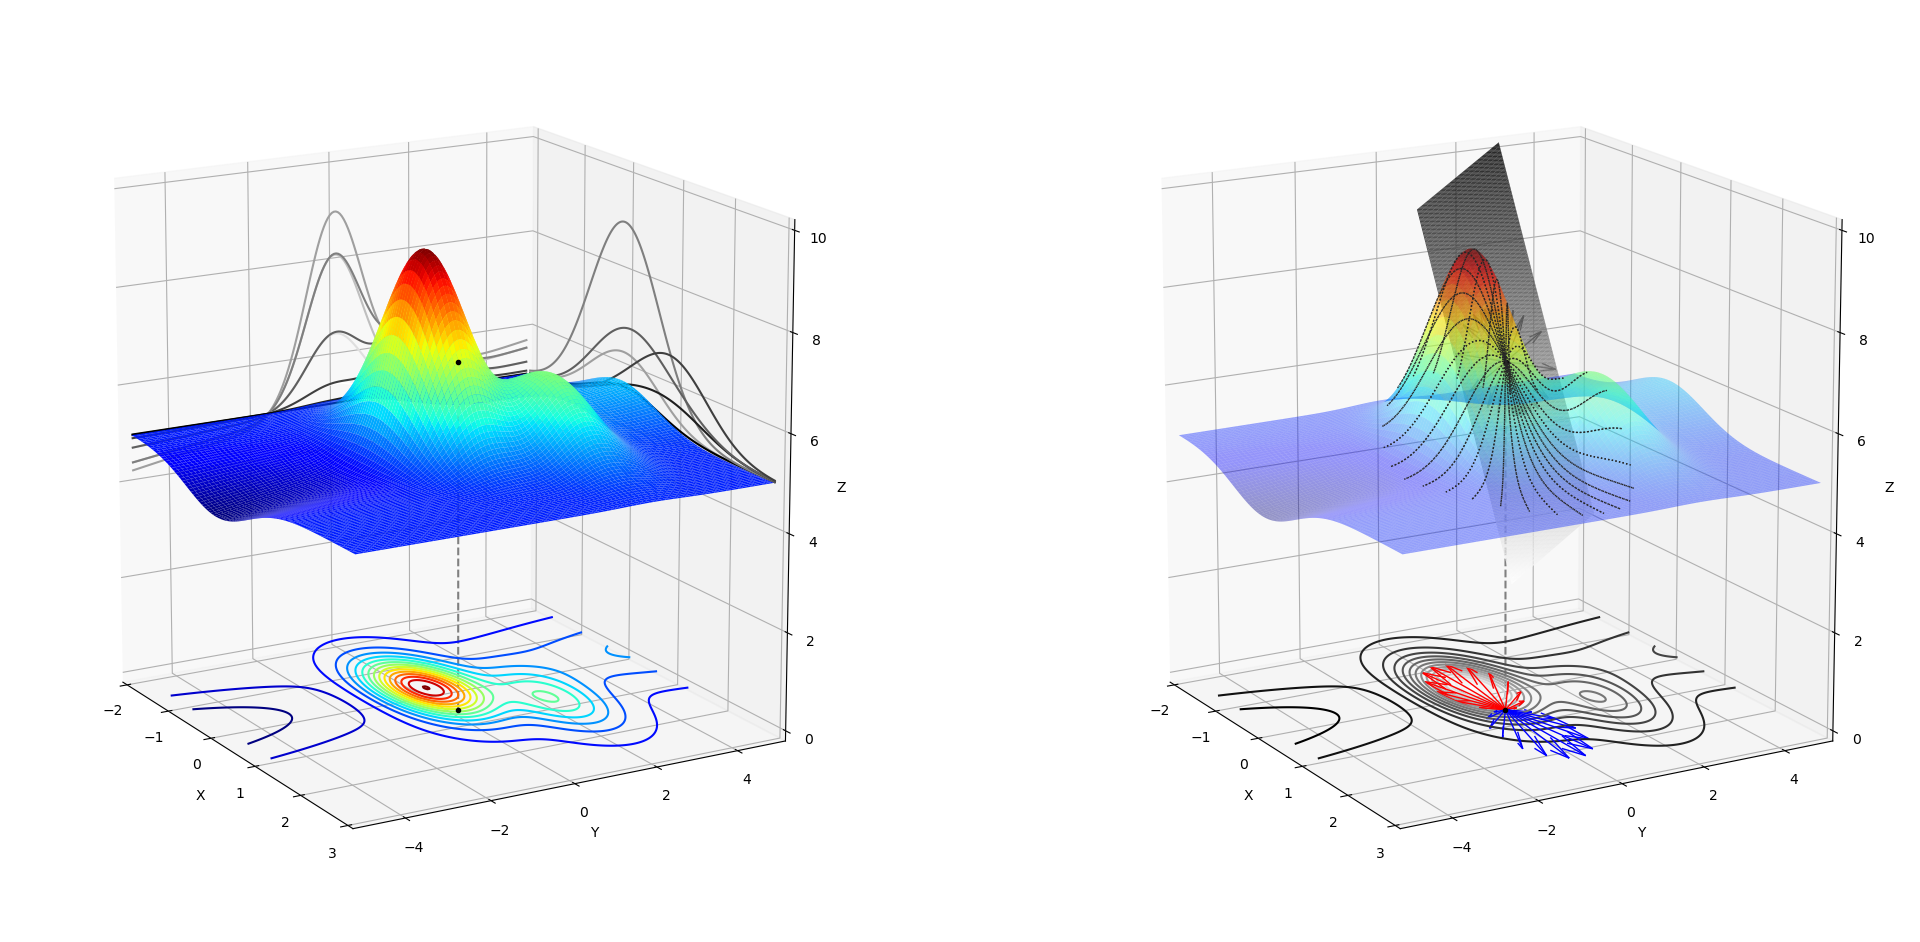

In [5]:
from IPython.display import Image
Image(filename='fv_3d.png') 

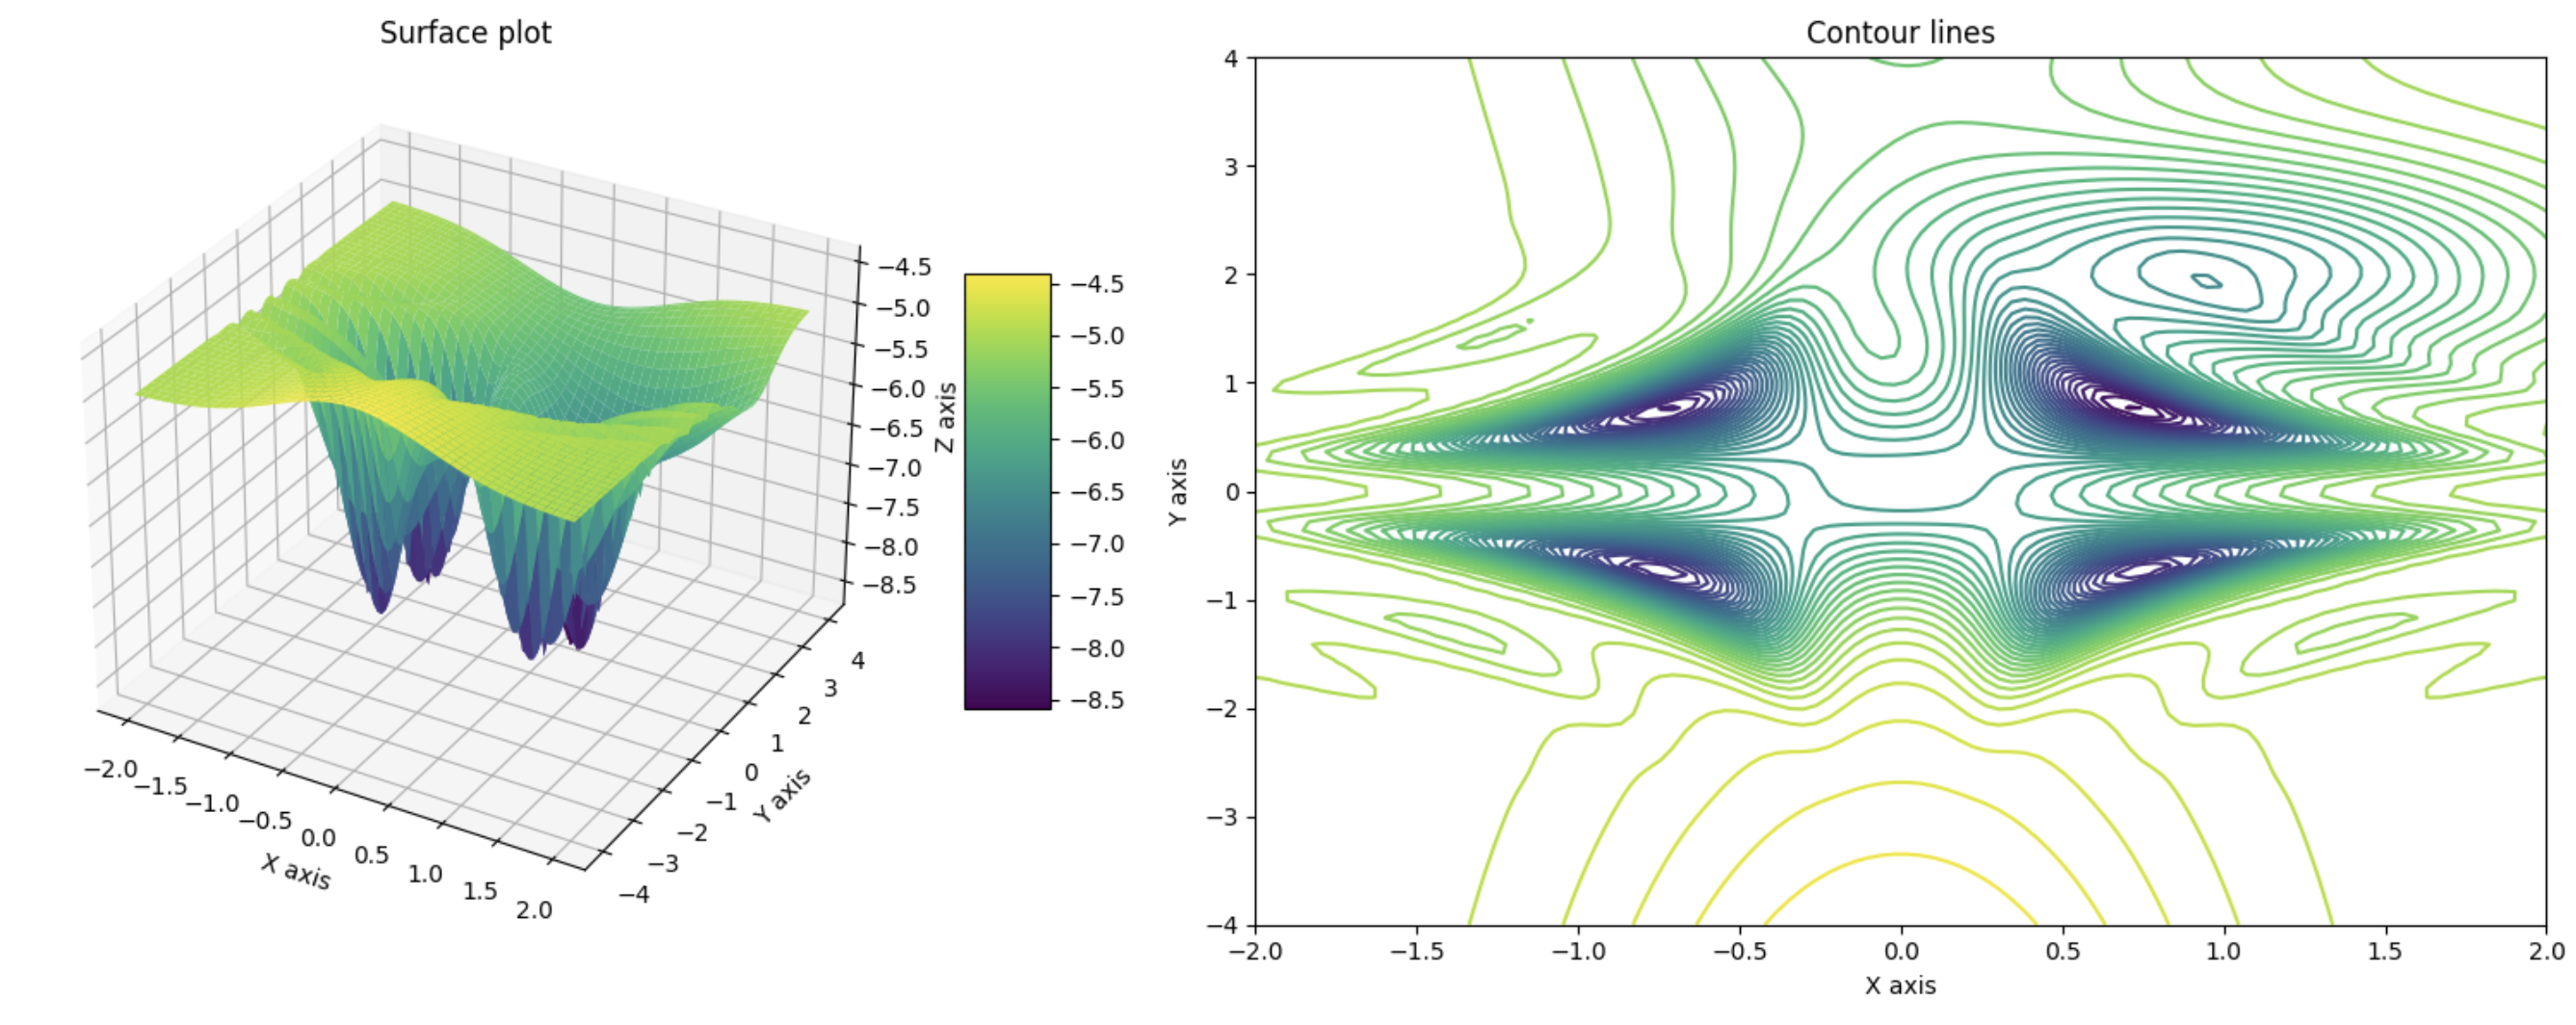

In [6]:
Image("contours.png")

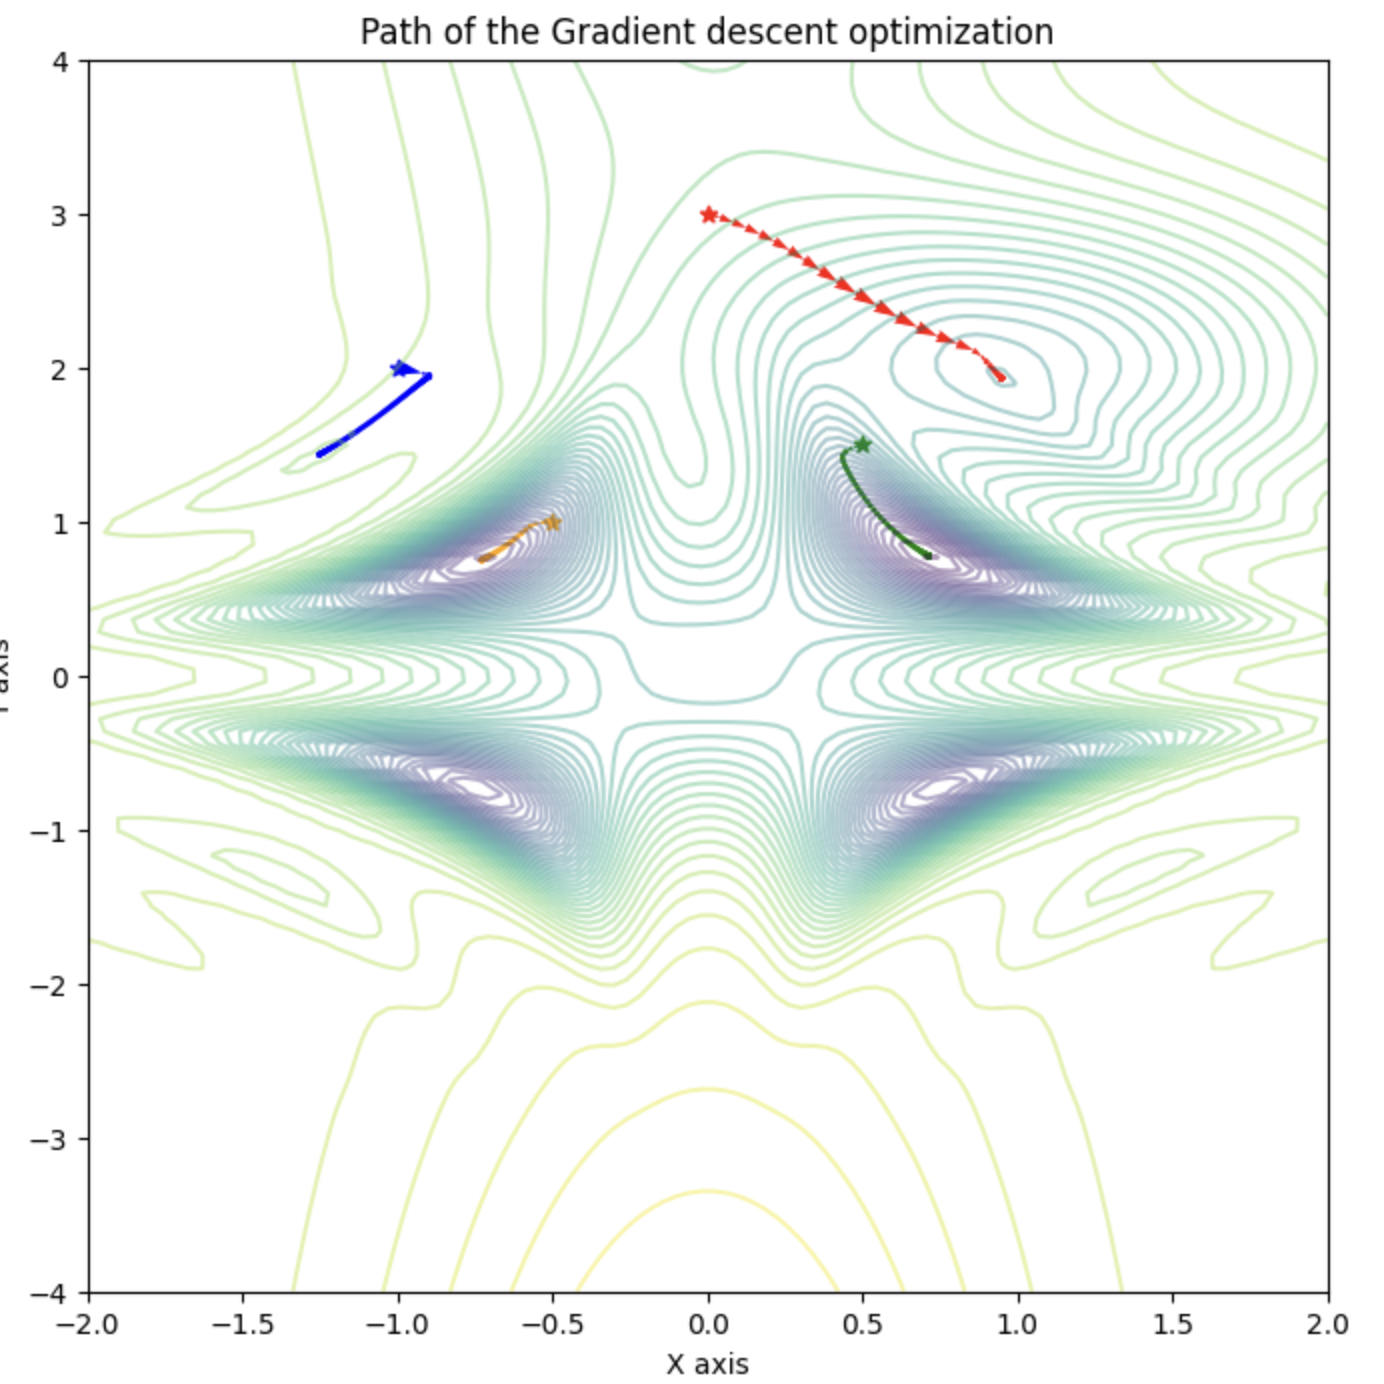

In [7]:
Image("grad_desc.png", width=600)

In [68]:
from tqdm import tqdm

def logreg_fit(X, y, learning_rate=0.001, num_epochs=10):

    loss_hist = []
    w = np.zeros(X.shape[1])
    
    for idx in tqdm(range(num_epochs)):

        gradient = backprop(X, w, y)

        w = w - gradient * learning_rate

        y_pred = feedforward(X, w)
        loss = log_loss(y, y_pred)
        loss_hist.append(loss)
    
    return w, loss_hist

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3773.60it/s]


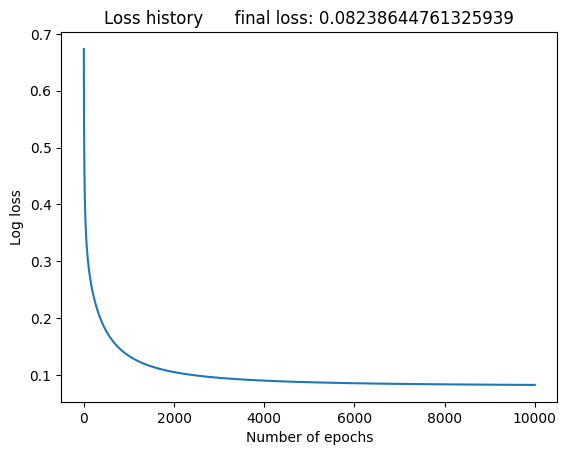

In [74]:
w_opt, loss_hist = logreg_fit(X, y, 1e-4, 10000)

plt.plot(loss_hist)
plt.xlabel("Number of epochs")
plt.ylabel("Log loss")
plt.title(f"Loss history      final loss: {loss_hist[-1]}");

## Try out different learning rate parameters: smaller, medium, larger ones

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3762.42it/s]


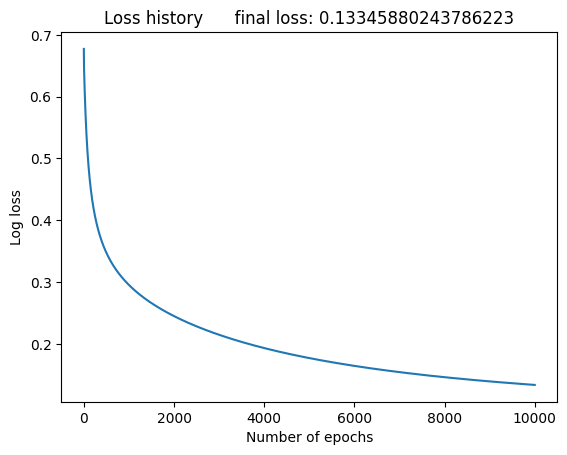

In [75]:
w_opt, loss_hist = logreg_fit(X, y, 1e-5, 10000)

plt.plot(loss_hist)
plt.xlabel("Number of epochs")
plt.ylabel("Log loss")
plt.title(f"Loss history      final loss: {loss_hist[-1]}");

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3706.56it/s]


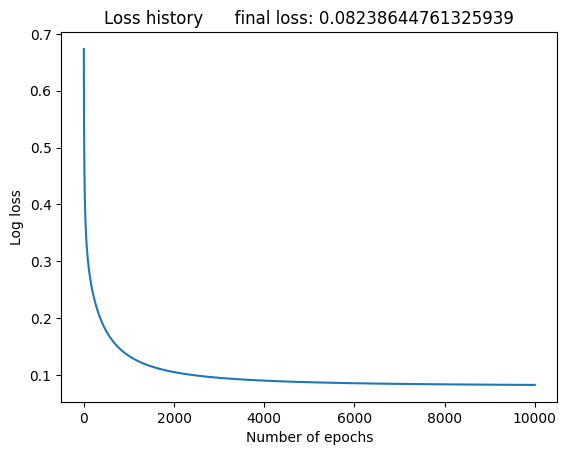

In [76]:
w_opt, loss_hist = logreg_fit(X, y, 1e-4, 10000)

plt.plot(loss_hist)
plt.xlabel("Number of epochs")
plt.ylabel("Log loss")
plt.title(f"Loss history      final loss: {loss_hist[-1]}");

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3760.45it/s]


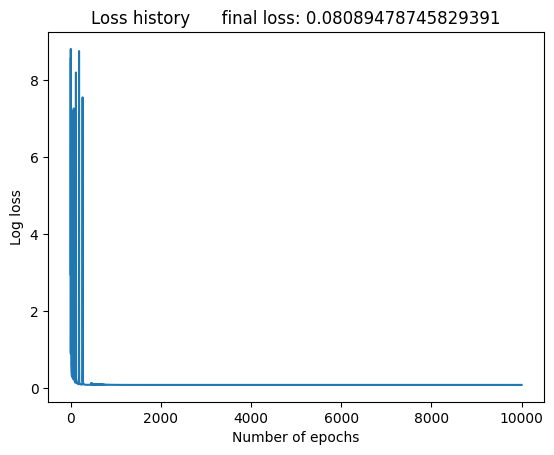

In [77]:
w_opt, loss_hist = logreg_fit(X, y, 1e-3, 10000)

plt.plot(loss_hist)
plt.xlabel("Number of epochs")
plt.ylabel("Log loss")
plt.title(f"Loss history      final loss: {loss_hist[-1]}");

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3749.72it/s]


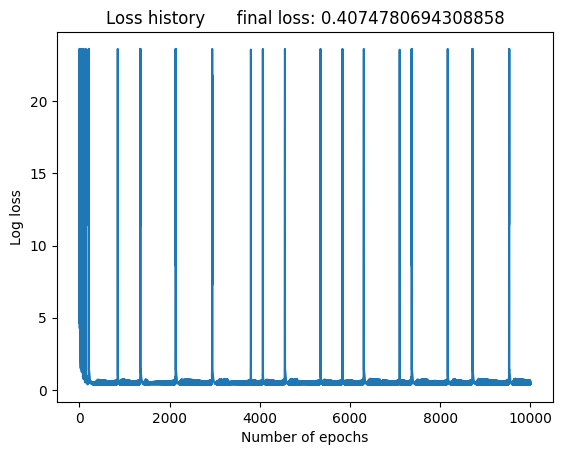

In [78]:
w_opt, loss_hist = logreg_fit(X, y, 1e-2, 10000)

plt.plot(loss_hist)
plt.xlabel("Number of epochs")
plt.ylabel("Log loss")
plt.title(f"Loss history      final loss: {loss_hist[-1]}");

  0%|                                                                                                                                                                                          | 0/50 [00:00<?, ?it/s]/var/folders/sq/_vdvf2nn51nbbtm87hrx368h0000gn/T/ipykernel_98039/3481577907.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/sq/_vdvf2nn51nbbtm87hrx368h0000gn/T/ipykernel_98039/3481577907.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/sq/_vdvf2nn51nbbtm87hrx368h0000gn/T/ipykernel_98039/3481577907.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/sq/_vdvf2nn51nbbtm87hrx368h0000gn/T/ipykernel_98039/3481577907.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/sq/_vdvf2nn51nbbtm87hrx368h0000gn/T/ipykernel_98039/3481577907.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/f

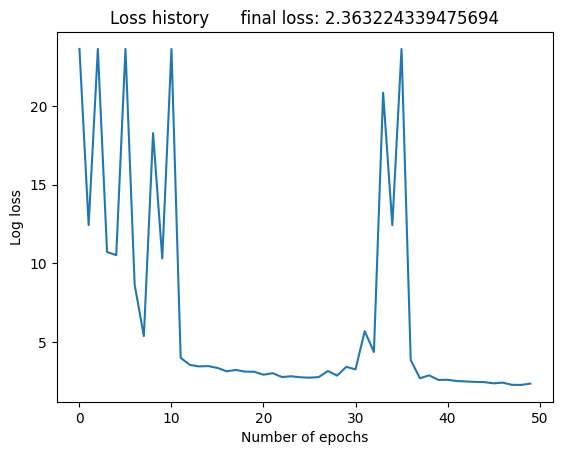

In [121]:
w_opt, loss_hist = logreg_fit(X, y, 1e-1, 50)

plt.plot(loss_hist)
plt.xlabel("Number of epochs")
plt.ylabel("Log loss")
plt.title(f"Loss history      final loss: {loss_hist[-1]}");

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3692.98it/s]


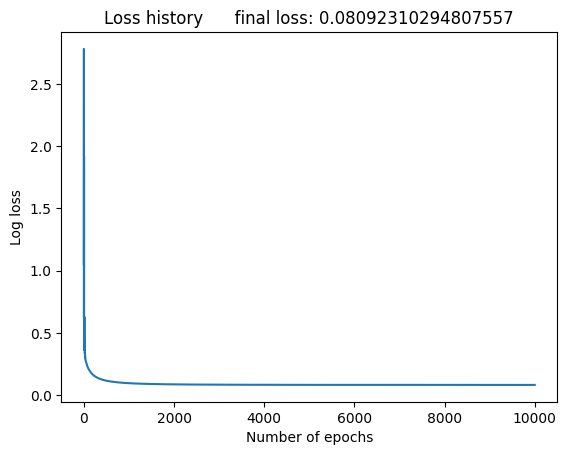

In [80]:
w_opt, loss_hist = logreg_fit(X, y, 3e-4, 10000)

plt.plot(loss_hist)
plt.xlabel("Number of epochs")
plt.ylabel("Log loss")
plt.title(f"Loss history      final loss: {loss_hist[-1]}");

# Stochastic Gradient Descent (SGD) algorithm

$$LOSS(w) = \sum_{num_{samples}} L_i(w)$$

- Shuffle the samples randomly
- iterate through the sum loop by batches and update $w$ after every single batch

In [97]:
rs = np.random.RandomState(42)

rs.choice(10, size=10, replace=False)

array([8, 1, 5, 0, 7, 2, 9, 4, 3, 6])

In [101]:
from tqdm import tqdm


def logreg_sgd_fit(X, y, learning_rate=0.001, num_epochs=10, batch_size=32, random_state=42):
   
    rs = np.random.RandomState(random_state)

    loss_hist = []
    w = np.zeros(X.shape[1])
    num_samples = X.shape[0]
    
    for _ in tqdm(range(num_epochs)):
        
        permutation = rs.choice(num_samples, size=num_samples, replace=False)
        X = X[permutation]
        y = y[permutation]
        
        for idx in range(num_samples // batch_size):

            X_batch = X[idx * batch_size: (idx + 1) * batch_size]
            y_batch = y[idx * batch_size: (idx + 1) * batch_size]

            gradient = backprop(X_batch, w, y_batch)
    
            w = w - gradient * learning_rate
    
            y_pred = feedforward(X, w)
            loss = log_loss(y, y_pred)
            loss_hist.append(loss)
    
    return w, loss_hist

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 171.38it/s]


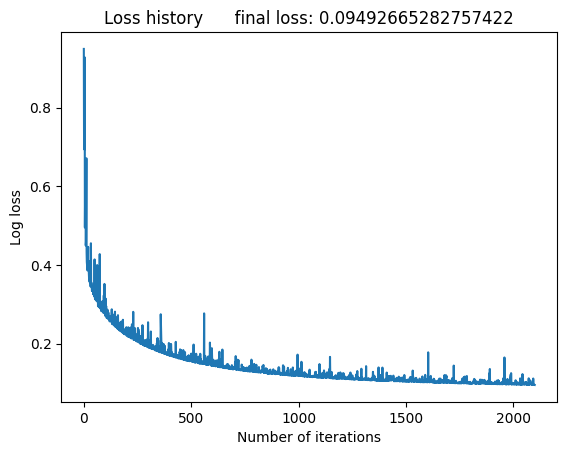

In [103]:
w_opt, loss_hist = logreg_sgd_fit(X, y, 3e-3, 100, batch_size=32)

plt.plot(loss_hist)
plt.xlabel("Number of iterations")
plt.ylabel("Log loss")
plt.title(f"Loss history      final loss: {loss_hist[-1]}");

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 170.10it/s]


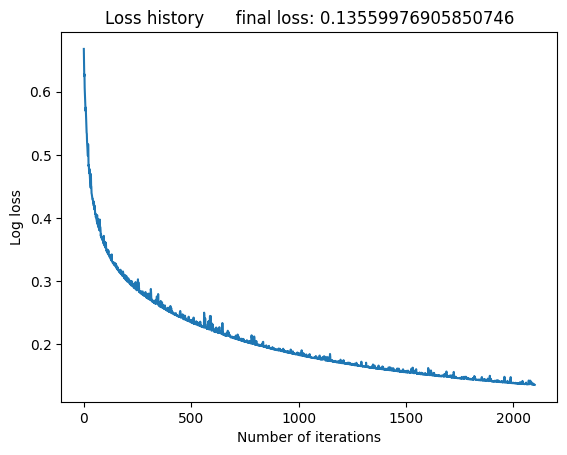

In [104]:
w_opt, loss_hist = logreg_sgd_fit(X, y, 1e-3, 100, batch_size=32)

plt.plot(loss_hist)
plt.xlabel("Number of iterations")
plt.ylabel("Log loss")
plt.title(f"Loss history      final loss: {loss_hist[-1]}");

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 172.22it/s]


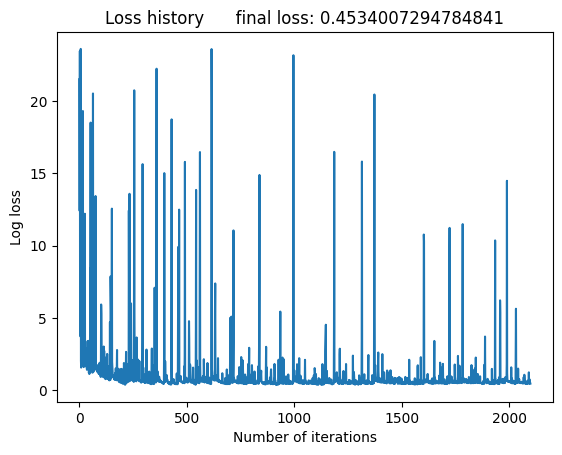

In [120]:
w_opt, loss_hist = logreg_sgd_fit(X, y, 1e-1, 100, batch_size=32)

plt.plot(loss_hist)
plt.xlabel("Number of iterations")
plt.ylabel("Log loss")
plt.title(f"Loss history      final loss: {loss_hist[-1]}");

In [10]:
### Apply some smoothing on the loss curves

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 164.93it/s]


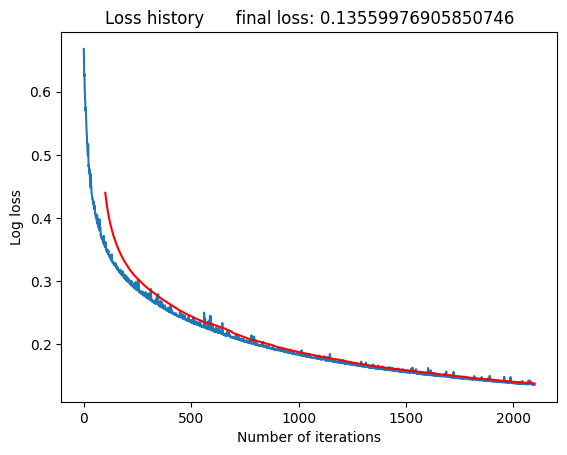

In [113]:
w_opt, loss_hist = logreg_sgd_fit(X, y, 1e-3, 100, batch_size=32)

plt.plot(loss_hist)
plt.xlabel("Number of iterations")
plt.ylabel("Log loss")

loss_smoothed = np.convolve(loss_hist, np.ones(100) / 100, mode="valid")
plt.plot(range(100, len(loss_smoothed) + 100), loss_smoothed, "r-")

plt.title(f"Loss history      final loss: {loss_hist[-1]}");

In [118]:
### Compare the results to the sklearn.linear_model implementation

w_opt, loss_hist = logreg_fit(X, y, 3e-4, 100000)
w_opt

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:26<00:00, 3776.54it/s]


array([-9.71454392,  0.53464755,  0.01128227,  0.32376783,  0.23762062,
        0.05832409,  0.42816088,  0.41212863,  0.15824303,  0.53584273])

In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=10000)

model.fit(X[:, 1:], y)

model.intercept_, model.coef_



(array([-9.72392166]),
 array([[0.53527556, 0.010504  , 0.32491021, 0.23780949, 0.0579741 ,
         0.4285776 , 0.41241511, 0.15827911, 0.53749624]]))

# Neural network training - backpropagation

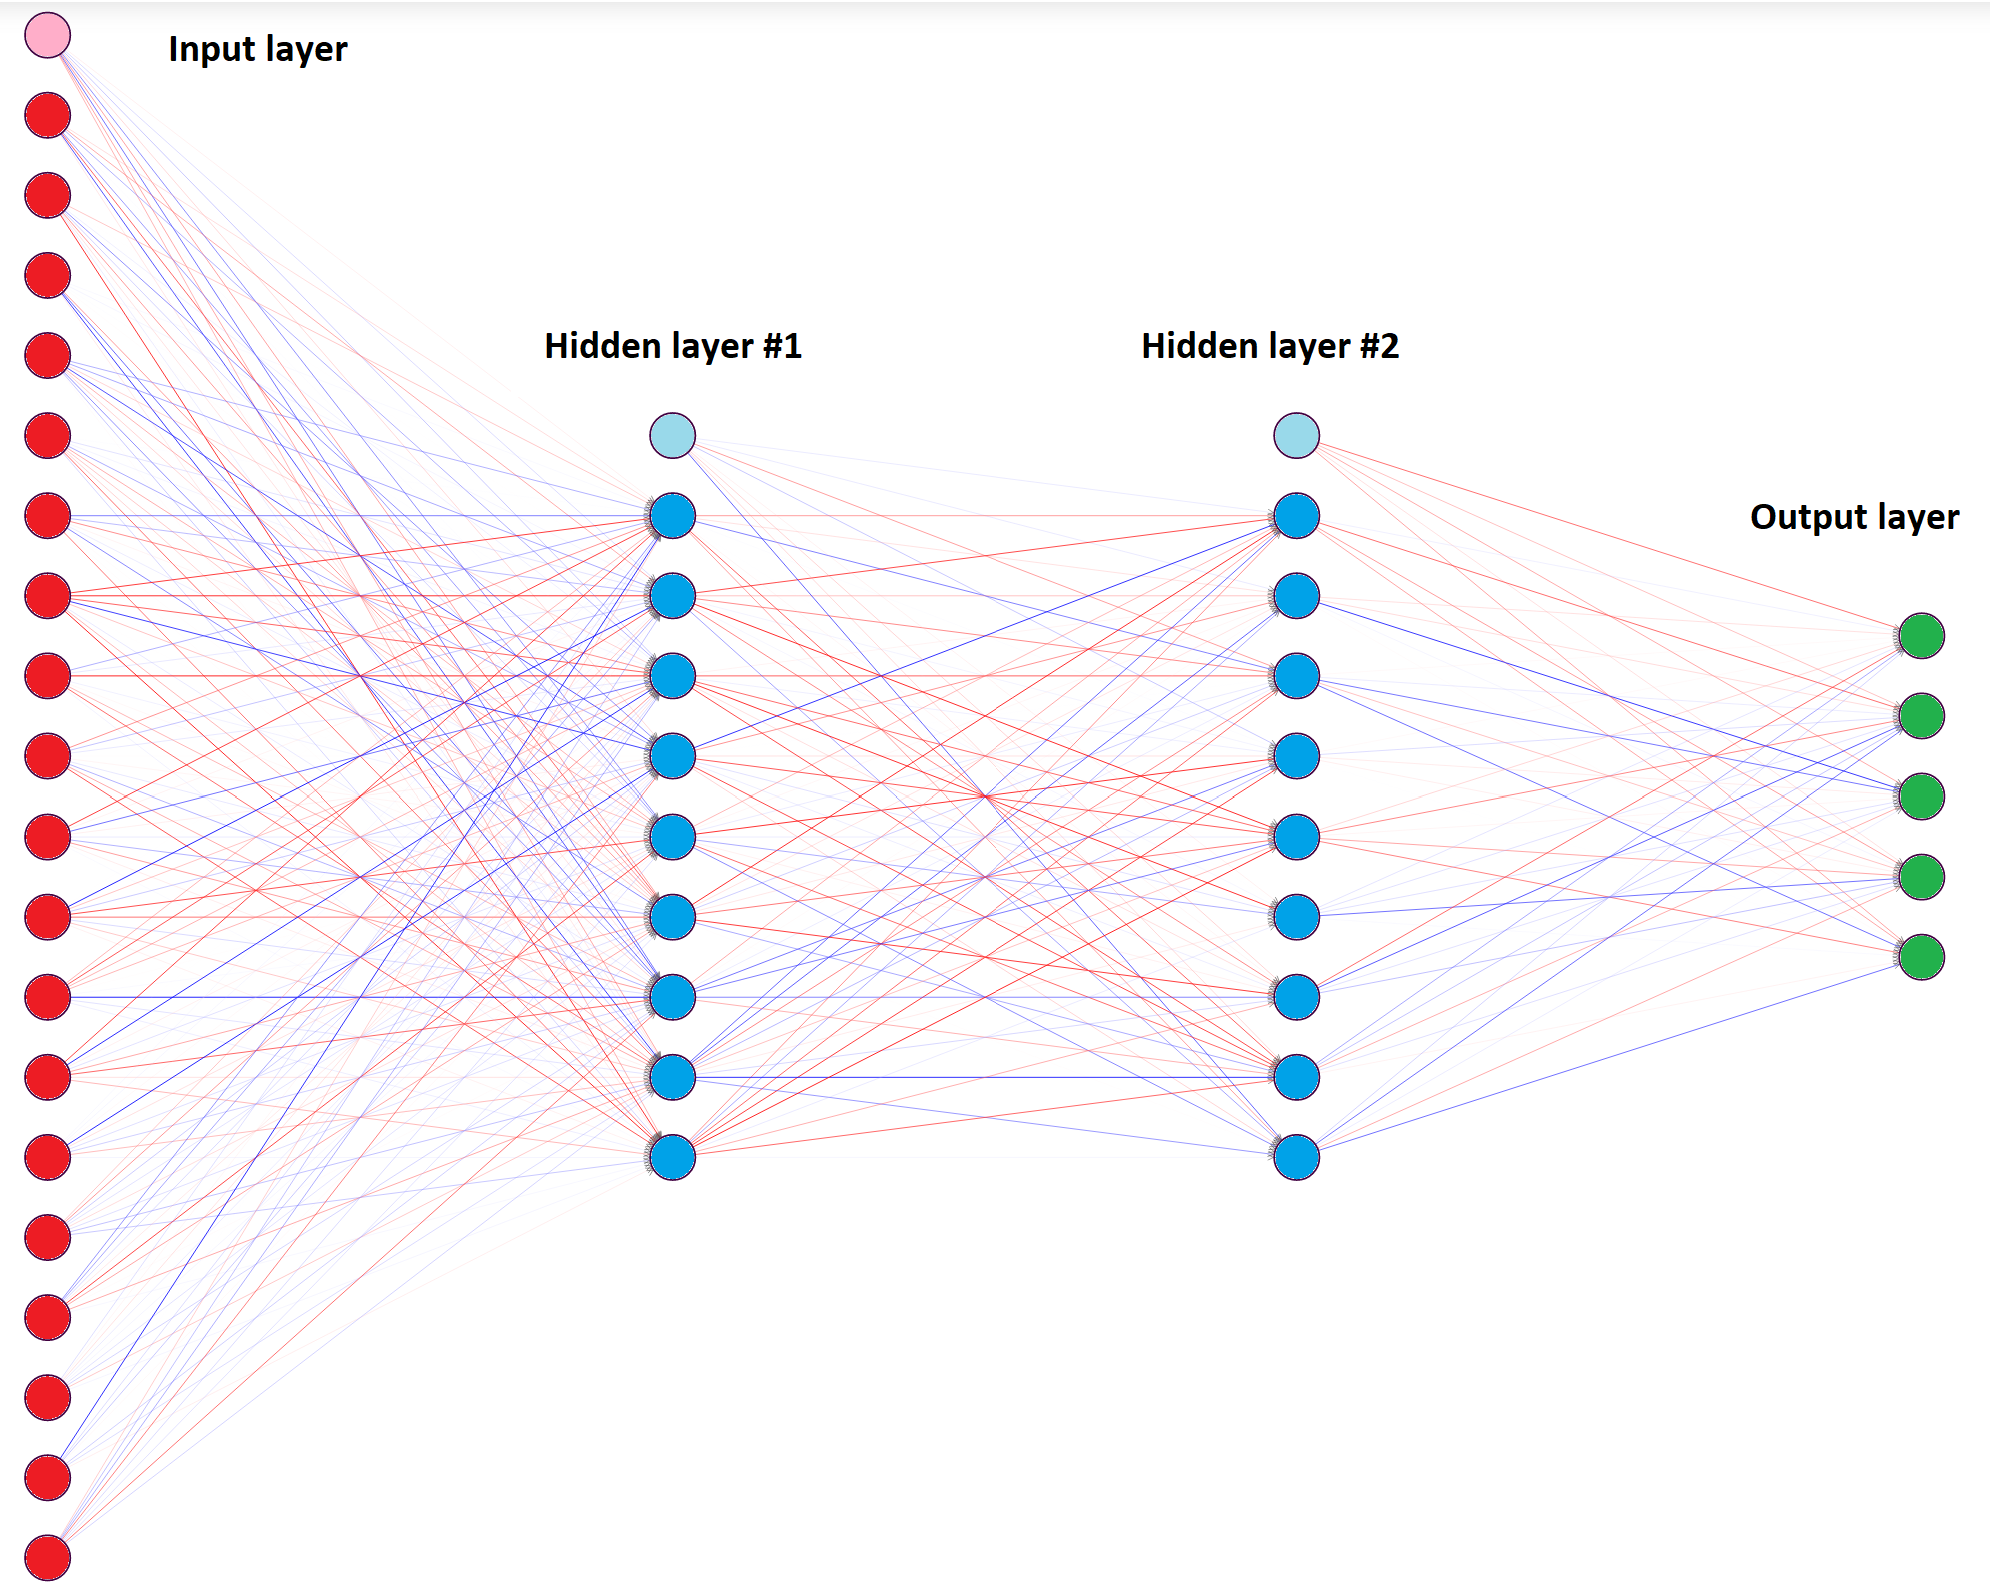

In [11]:
Image(filename='nn.png')

# Backpropagation algorithm

How can we optimize the weights in a general neural network? We need gradients, i.e. the partial derivatives with respect to all of the weights.

Let's try to understand the calculation with a simple example. We have a 2D binary classification problem with 1 hidden layer of $h$ neurons. We need two weight matrices: $W^{(1)}$ of size $3 \times h$ and $W^{(2)}$ of size $(h + 1) \times 1$
Forward propagation just consists of matrix-vector multiplications and applying the activation functions

$$
\begin{array}{lll}
\begin{array}{l}
x_0 = 1\\
x_1\\
x_2
\end{array}
&\hspace{0.3cm}
\begin{array}{l}
z^{(1)}_1 = W^{(1)}_{01} + W^{(1)}_{11}x_1 + W^{(1)}_{21}x_2\\
z^{(1)}_2 = W^{(1)}_{02} + W^{(1)}_{12}x_1 + W^{(1)}_{22}x_2\\
\vdots\\
z^{(1)}_h = W^{(1)}_{0h} + W^{(1)}_{1h}x_1 + W^{(1)}_{2h}x_2
\end{array}
&\hspace{0.3cm}
\begin{array}{l}
a^{(1)}_0 = 1\\
a^{(1)}_1 = \sigma\left(z^{(1)}_1\right) \\
a^{(1)}_2 = \sigma\left(z^{(1)}_2\right) \\
\vdots\\
a^{(1)}_h = \sigma\left(z^{(1)}_h\right)
\end{array}
& \hspace{0.3cm}
\begin{array}{l}
z^{(2)}_1 = W^{(2)}_{01} + W^{(2)}_{11}a^{(1)}_1 + W^{(2)}_{21}a^{(1)}_2 + \cdots + W^{(2)}_{h1}a^{(1)}_h\\
\end{array}
& \hspace{0.3cm}
\begin{array}{l}
y_{pred} = a^{(2)}_1 =  \sigma\left(z^{(2)}_1\right)\\
\end{array}
\end{array}
$$

The contribution of a single sample to the log loss function:

$$L = -y_{true}\log(y_{pred})-(1-y_{true})\log(1-y_{pred})$$

We have to calculate the partial derivatives of $L$ with respect to the entries of $W^{(1)}$ and $W^{(2)}$. It is easier to start from backwards with the $W^{(2)}$ weights and apply the chain rule:

$$\frac{\partial L}{\partial W^{(2)}_{i1}} = -y_{true} \cdot \frac{1}{y_{pred}} \cdot \frac{\partial  \sigma\left(z^{(2)}_1\right) }{\partial W^{(2)}_{i1}} + (1-y_{true}) \cdot \frac{1}{1-y_{pred}} \cdot \frac{\partial  \sigma\left(z^{(2)}_1\right) }{\partial W^{(2)}_{i1}}  $$

$$\frac{\partial L}{\partial W^{(2)}_{i1}} = -y_{true} \cdot \frac{1}{\sigma\left(z^{(2)}_1\right)} \cdot 
\sigma\left(z^{(2)}_1\right) \left(1-\sigma\left(z^{(2)}_1\right)\right) \cdot a^{(1)}_{i}
+ (1-y_{true}) \cdot \frac{1}{1- \sigma\left(z^{(2)}_1\right)} \cdot 
\sigma\left(z^{(2)}_1\right) \left(1-\sigma\left(z^{(2)}_1\right)\right)  \cdot a^{(1)}_{i}
$$

$$\frac{\partial L}{\partial W^{(2)}_{i1}} = \left(y_{pred} - y_{true}\right) a^{(1)}_{i} = \delta^{(2)}_{1} a^{(1)}_{i}$$

Now we can get the derivatives w.r.t. the entries of  $W^{(1)}$ by using a massive amount of chain rules:


$$\frac{\partial L}{\partial W^{(1)}_{ij}} = -y_{true} \cdot \frac{1}{y_{pred}} \cdot \frac{\partial  \sigma\left(z^{(2)}_1\right) }{\partial W^{(1)}_{ij}} + (1-y_{true}) \cdot \frac{1}{1-y_{pred}} \cdot \frac{\partial  \sigma\left(z^{(2)}_1\right) }{\partial W^{(1)}_{ij}} = $$
$$
 -y_{true} \cdot \frac{1}{y_{pred}} \cdot \frac{\partial  \sigma\left(z^{(2)}_1\right) } {\partial z^{(1)}_j}\cdot
 \frac{\partial z^{(1)}_j}{\partial W^{(1)}_{ij}}
 + (1-y_{true}) \cdot \frac{1}{1-y_{pred}} \cdot \frac{\partial \sigma\left(z^{(2)}_1\right) }{\partial z^{(1)}_j}\cdot
 \frac{\partial z^{(1)}_j}{\partial W^{(1)}_{ij}} = 
$$
$$
= \left(y_{pred} - y_{true}\right) \cdot W^{(2)}_{j1}a^{(1)}_j \left(1-a^{(1)}_j\right) \cdot x_i
$$
$$\frac{\partial L}{\partial W^{(1)}_{ij}} = \delta^{(1)}_{j} \cdot x_i$$

Short summary:

- using a given set of weights we can use feedforward calculation to get the activations and outputs
- we calculate the $\delta^{(2)} = y_{pred} - y_{true}$ error on the output layer 
- we propagate the errors backwards to calculate other $\delta$ values
$$\delta^{(1)} = W^{(2)}\delta^{(2)} \cdot a^{(1)} \cdot \left(1 - a^{(1)}\right)$$
- from the deltas we can simply get the partial derivatives:
$$\frac{\partial L}{\partial W^{(1)}_{ij}} = \delta^{(1)}_{j} \cdot x_i = \textrm{(delta on the next layer)} \times \textrm{(activation on the previous layer)}$$
- then we have the gradient and can apply any gradient-based optimization method